In [224]:
#pip install opencv-python

# Detector de bordes opencv

In [225]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

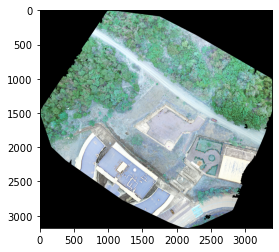

In [226]:
imgpath = "Mosaicos/bosqueed.tif"
imagen = cv2.imread(imgpath)
plt.imshow(imagen) 

cv2.canny para detectar bordes

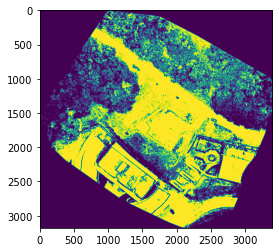

In [227]:
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
ret, bw_img = cv2.threshold(gris, 168, 170, cv2.THRESH_BINARY) 
plt.imshow(bw_img)

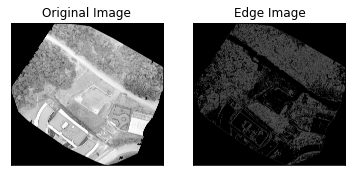

In [228]:
edges = cv2.Canny(bw_img,100,180)
plt.subplot(121),plt.imshow(gris,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

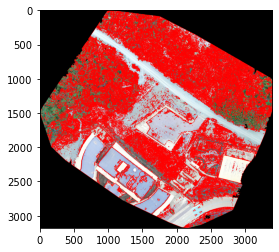

In [229]:
(contornos,_) = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
im = cv2.drawContours(imagen,contornos,-1,(255,0,0), 4)
plt.imshow(im)